In [1]:
from _element import feature_control as ft_c

In [2]:
from _element import calculations as calc

In [3]:
from _usecase import algorithm_prophet as prpt

In [4]:
import pandas as pd

In [5]:
from datetime import datetime

In [6]:
from _element import varr

In [7]:
INPUT_FILENAME= 'KPP일별투입(10_17)_withcompanycode.xlsx'

In [8]:
df_raw= ft_c.xlsx_opener(varr.PJ_DIR+varr.DF_DIR, INPUT_FILENAME)

In [9]:
df_temp= ft_c.xlsx_opener(varr.PJ_DIR+varr.TEMP_DATA_DIR, 'temp_data_merged.xlsx')

In [10]:
y_col= df_raw.columns.values.tolist()

In [11]:
try:
    y_col.remove('ds')
except ValueError:
    pass

In [12]:
y_col

[227645, 230054, 247467, 265812, 269255, 283639]

In [13]:
x_col= df_temp.columns.values.tolist()

In [14]:
x_col

['ds', 'temp_max', 'temp_min', 'rain_amount']

In [15]:
df_raw['ds']= pd.to_datetime(df_raw['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [16]:
df_temp['ds']= pd.to_datetime(df_temp['ds'], box=True, format= '%Y/%m/%d', exact=True)

In [17]:
df_raw= pd.merge(df_raw, df_temp, how='inner', on='ds')

In [18]:
result_dict= {}
for y in y_col:
    result_dict[y]= prpt.Bayseian2(df_raw, varr.FORECASTDAY, y, x_col, 'day')

INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.
INFO:fbprophet.forecaster:Found custom seasonality named "weekly", disabling built-in weekly seasonality.


In [19]:
forecast_dict= {}
print(INPUT_FILENAME)
for y in y_col:
    result_dict[y]['future']['ds']= pd.to_datetime(result_dict[y]['future']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    result_dict[y]['forecastProphetTable']['ds']= pd.to_datetime(result_dict[y]['forecastProphetTable']['ds'], box=True, format= '%Y/%m/%d', exact=True)
    forecast_dict[y]= prpt.extract_info_from(result_dict[y]['future'], result_dict[y]['forecastProphetTable'], varr.FORECASTDAY)
    forecast_dict[y]['result_df']= pd.merge(forecast_dict[y]['result_df'], df_raw[['ds', y]], how='inner', on='ds')
    print('RMSE with segment '+str(y)+': '+str(calc.rms_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE with segment '+str(y)+': '+str(calc.map_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_with_std with segment '+str(y)+': '+str(calc.map_error_with_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('MAPE_div_std with segment '+str(y)+': '+str(calc.map_error_div_std(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print('sMAPE of company code '+str(y)+': '+str(calc.smap_error(forecast_dict[y]['result_df'][y], forecast_dict[y]['result_df']['yhat'])))
    print(forecast_dict[y]['result_df'].head())
    ft_c.save_as_xlsx(varr.PJ_DIR+varr.DF_DIR, forecast_dict[y]['result_df'], INPUT_FILENAME, '_seg'+str(y)+'withoutweekday')
    print('\n')

KPP일별투입(10_17)_withcompanycode.xlsx
RMSE with segment 227645: 428.58142791
MAPE with segment 227645: inf
MAPE_with_std with segment 227645: 26.863301043
MAPE_div_std with segment 227645: 85.0977341129
sMAPE of company code 227645: 12.8869019793
          ds   temp_max  temp_min  rain_amount         yhat  227645
0 2017-11-01  17.299999      13.4          0.0  1707.024490    2048
1 2017-11-02  18.000000      14.0          1.6  1711.172215    1792
2 2017-11-03  15.700000       4.5          0.6  1628.425402    1280
3 2017-11-04  12.800000       3.2          0.0  1001.386743     768
4 2017-11-05  14.200000       7.3          0.0   596.007918       0


c:\Studying\Project_Nextop\nextop-engine\nextop_engine\_element\calculations.py:11: RuntimeWarning: divide by zero encountered in true_divide
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100




RMSE with segment 230054: 453.590253778
MAPE with segment 230054: inf
MAPE_with_std with segment 230054: 69.6372400283
MAPE_div_std with segment 230054: 82.840044126
sMAPE of company code 230054: 48.7923404988
          ds   temp_max  temp_min  rain_amount        yhat  230054
0 2017-11-01  17.299999      13.4          0.0  475.053029    1152
1 2017-11-02  18.000000      14.0          1.6  416.914945     288
2 2017-11-03  15.700000       4.5          0.6  822.649927     864
3 2017-11-04  12.800000       3.2          0.0  564.973667     288
4 2017-11-05  14.200000       7.3          0.0 -753.923988       0


RMSE with segment 247467: 628.726009595
MAPE with segment 247467: inf
MAPE_with_std with segment 247467: 43.0148256986
MAPE_div_std with segment 247467: 76.0352878421
sMAPE of company code 247467: 14.7948555138
          ds   temp_max  temp_min  rain_amount         yhat  247467
0 2017-11-01  17.299999      13.4          0.0  2320.194995    2048
1 2017-11-02  18.000000      14.0    

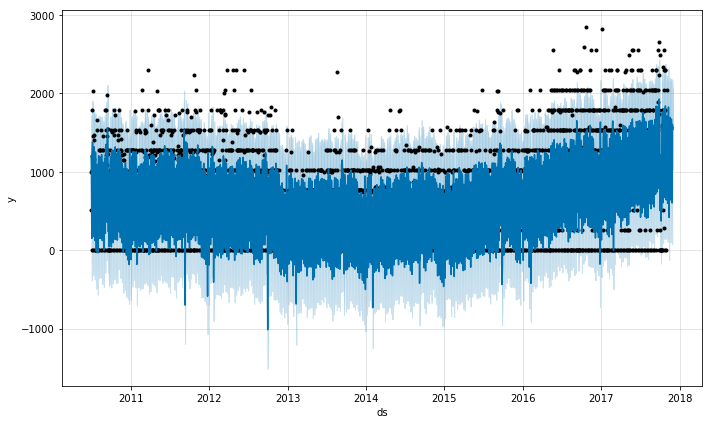

In [22]:
result_dict[227645]['model'].plot(result_dict[227645]['forecastProphetTable'])

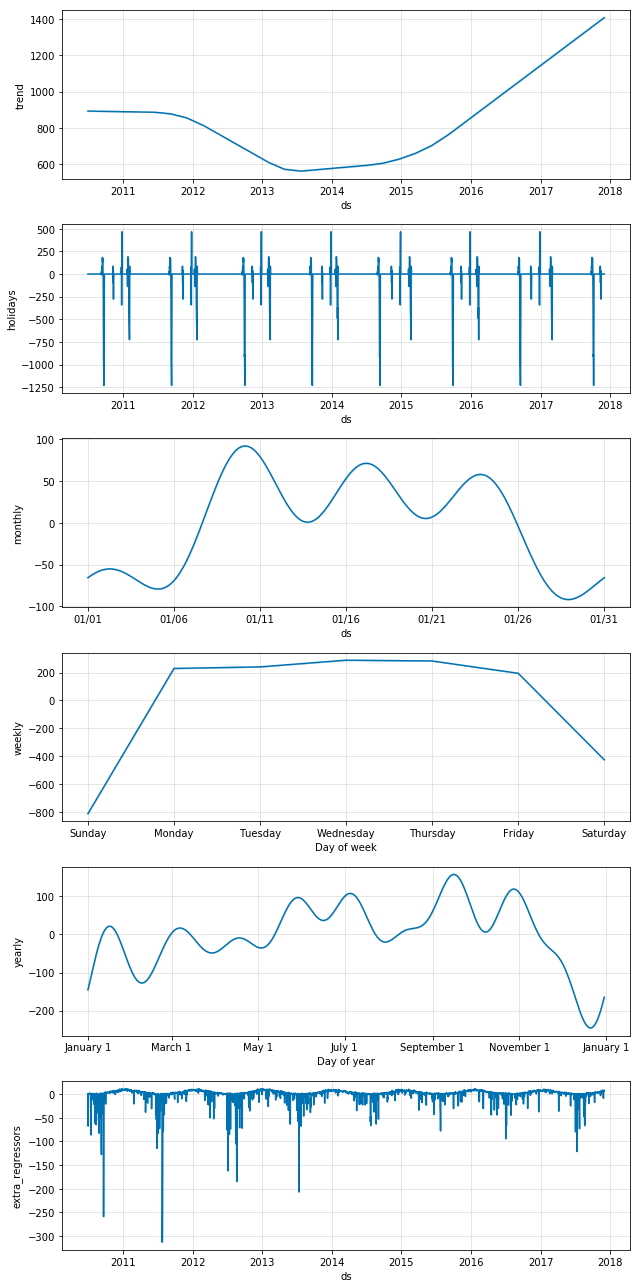

In [23]:
result_dict[227645]['model'].plot_components(result_dict[227645]['forecastProphetTable'])

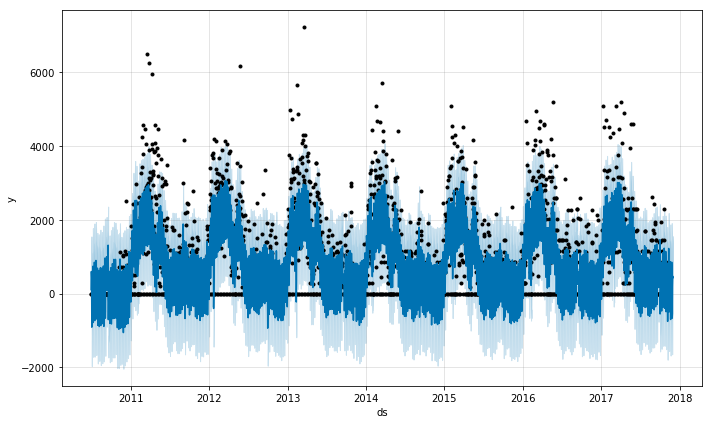

In [24]:
result_dict[230054]['model'].plot(result_dict[230054]['forecastProphetTable'])

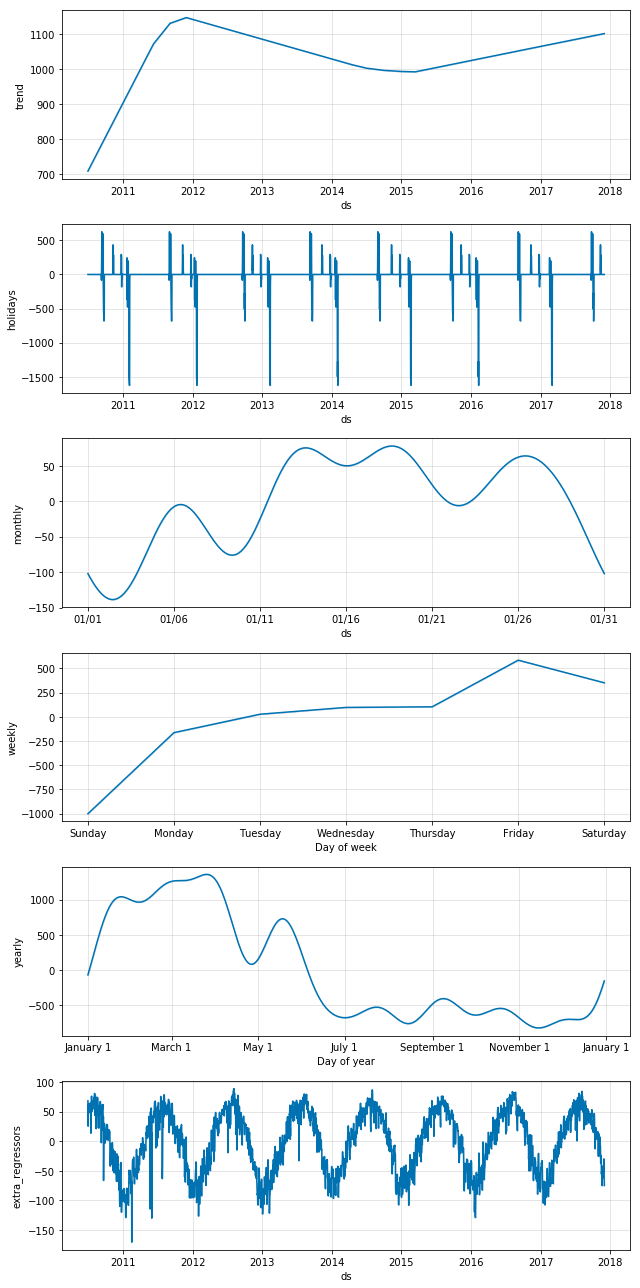

In [25]:
result_dict[230054]['model'].plot_components(result_dict[230054]['forecastProphetTable'])

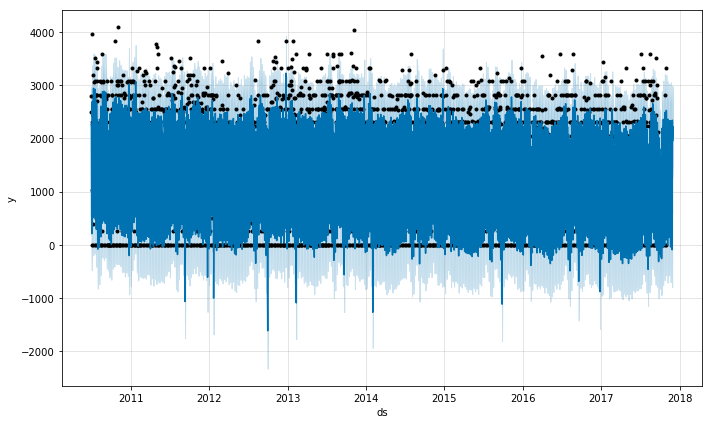

In [26]:
result_dict[247467]['model'].plot(result_dict[247467]['forecastProphetTable'])

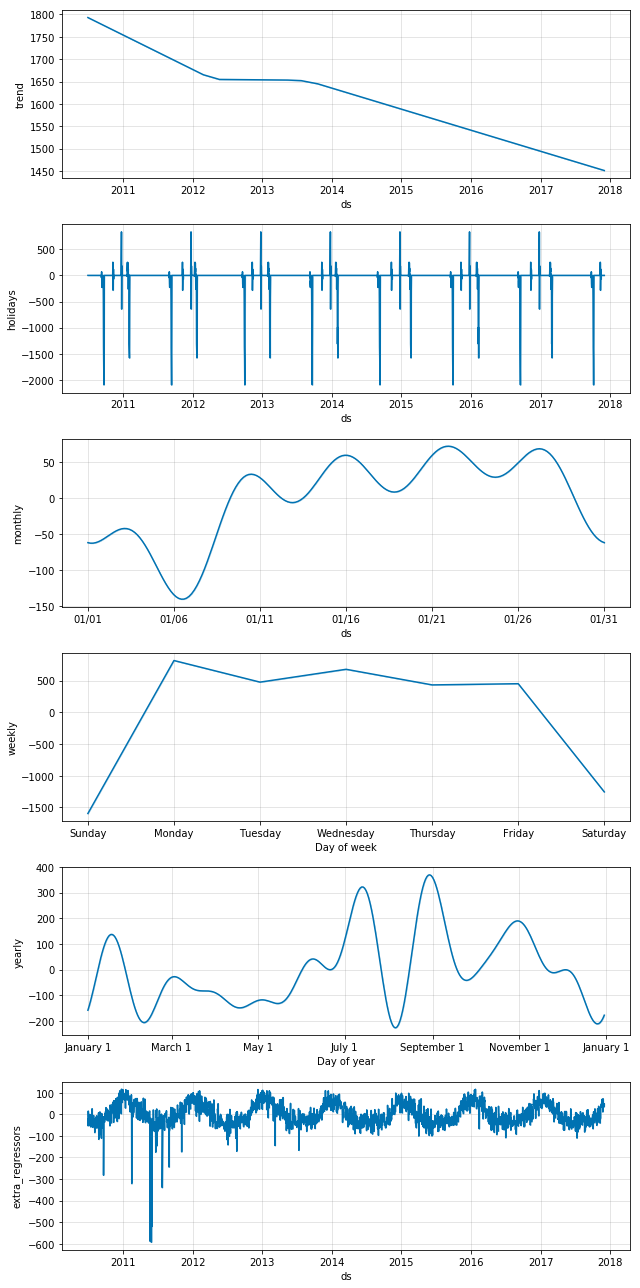

In [27]:
result_dict[247467]['model'].plot_components(result_dict[247467]['forecastProphetTable'])

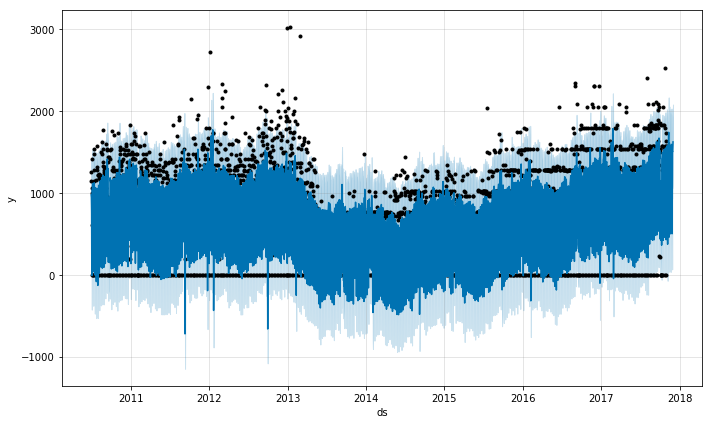

In [28]:
result_dict[265812]['model'].plot(result_dict[265812]['forecastProphetTable'])

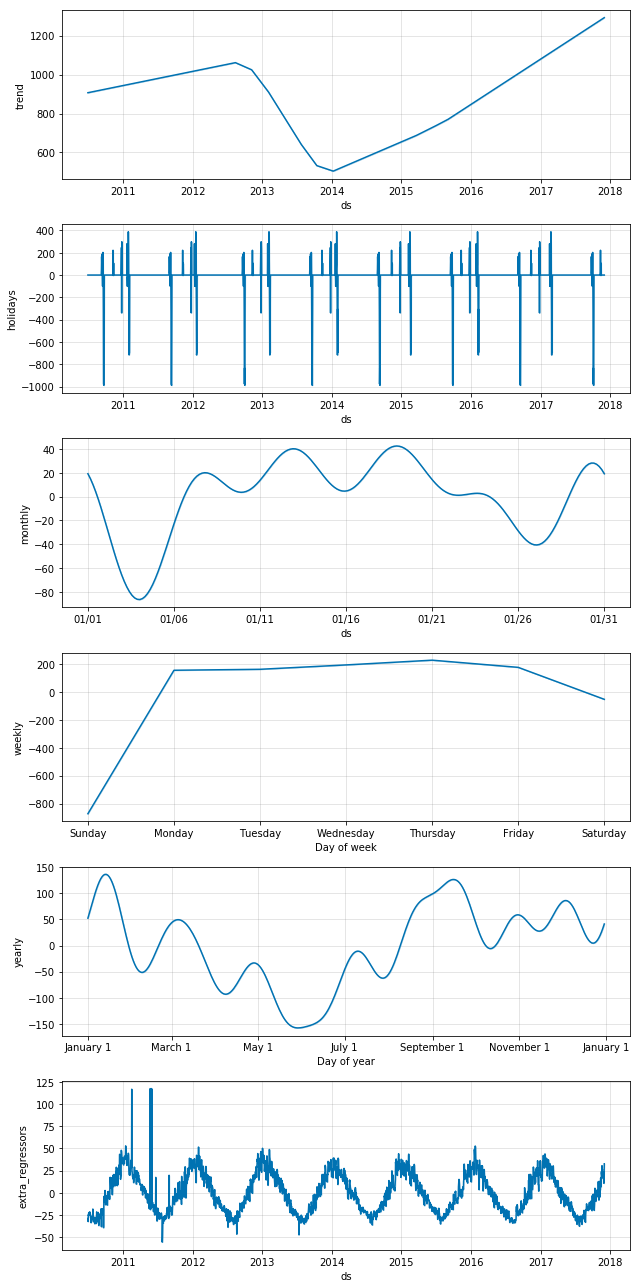

In [29]:
result_dict[265812]['model'].plot_components(result_dict[265812]['forecastProphetTable'])

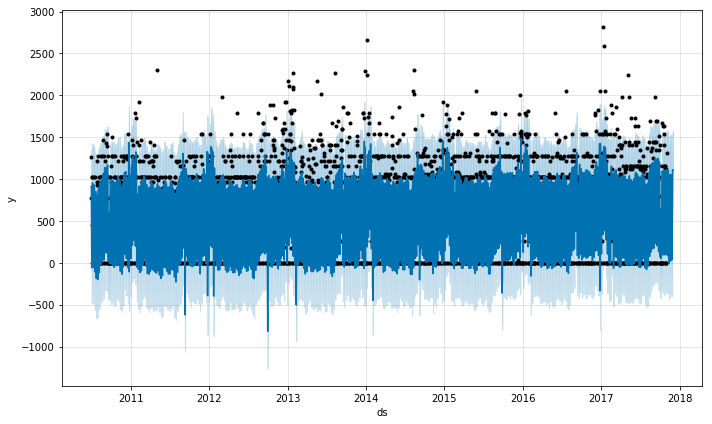

In [30]:
result_dict[269255]['model'].plot(result_dict[269255]['forecastProphetTable'])

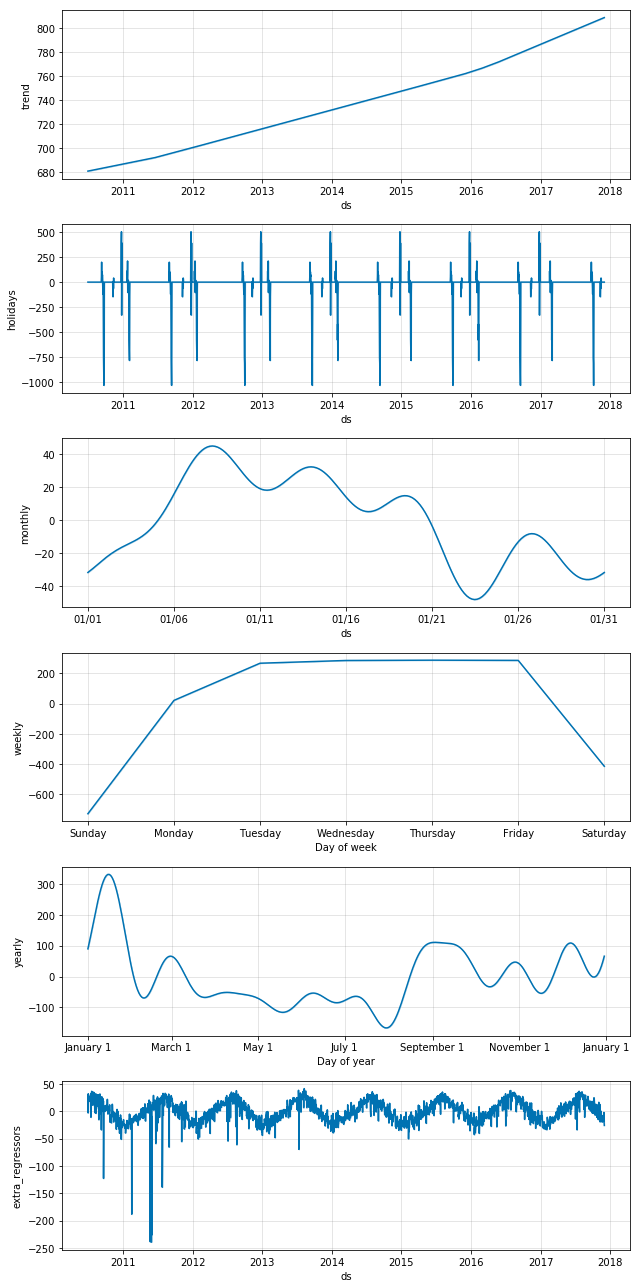

In [31]:
result_dict[269255]['model'].plot_components(result_dict[269255]['forecastProphetTable'])

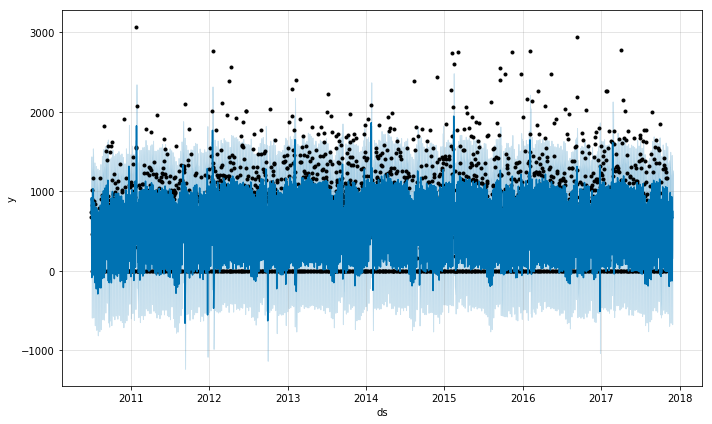

In [32]:
result_dict[283639]['model'].plot(result_dict[283639]['forecastProphetTable'])

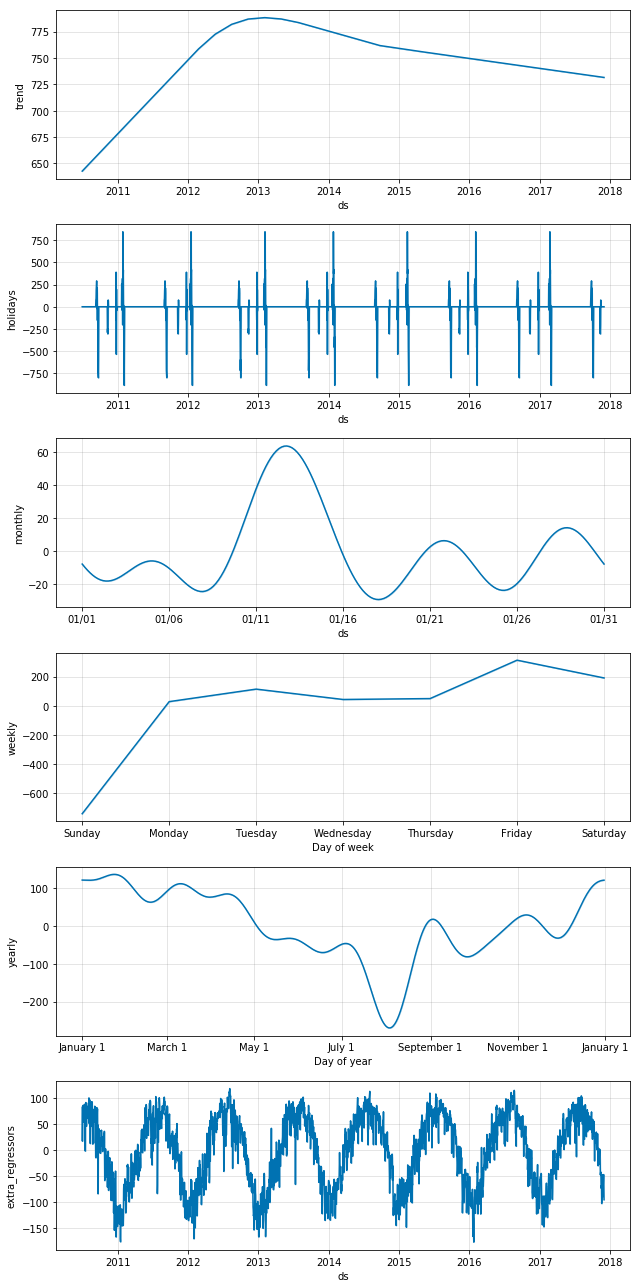

In [33]:
result_dict[283639]['model'].plot_components(result_dict[283639]['forecastProphetTable'])